#### Get data from Kaggle

In [44]:
!kaggle datasets download -d dhanushnarayananr/credit-card-fraud
!unzip credit-card-fraud.zip
!rm -rf credit-card-fraud.zip
!mv card_transdata.csv ../../data/card_transdata.csv

 97%|████████████████████████████████████▊ | 28.0M/28.9M [00:03<00:00, 7.61MB/s]
100%|██████████████████████████████████████| 28.9M/28.9M [00:03<00:00, 7.58MB/s]
Archive:  credit-card-fraud.zip
  inflating: card_transdata.csv      


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### feature info

distance_from_home: continous

distance_from_last_transaction: continous

ratio_to_median_purchase_price: continous

repeat_retailer: binary 

used_chip: binary

used_pin_number: binary 

online_order: binary

__fraud: binary (target)__

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


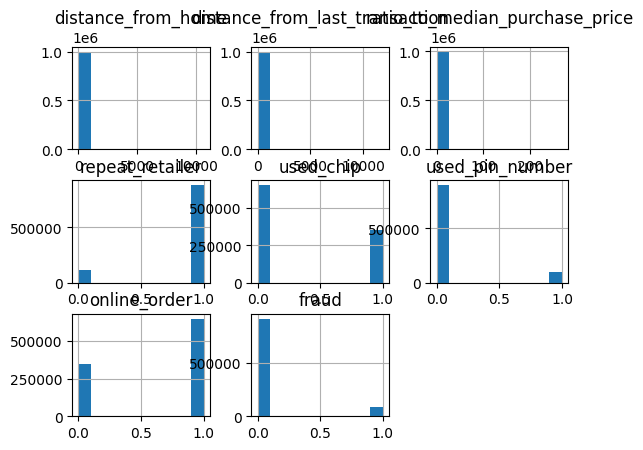

In [2]:
data = pd.read_csv('../../data/card_transdata.csv')
print(data.columns)
data.hist()
data.describe()

# Standardizing

Standardizing continous features - distances and ratios have very different ranges

In [3]:
from sklearn.preprocessing import StandardScaler

continuous_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

# Balancing

https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

Should do some balancing on the binary features - use [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) in imblearn library

SMOTENC has been the best (results wise)

In [4]:
X = data.drop(columns=['fraud'])
y = data['fraud']

X.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.274163e-16,6.134027e-17,-2.633751e-16,0.881536,0.350399,0.100608,0.650552
std,1.000001e+00,1.000001e+00,1.000001e+00,0.323157,0.477095,0.300809,0.476796
min,-4.071511e-01,-1.948839e-01,-6.500182e-01,0.000000,0.000000,0.000000,0.000000
25%,-3.479205e-01,-1.834088e-01,-4.816812e-01,1.000000,0.000000,0.000000,0.000000
50%,-2.547919e-01,-1.562457e-01,-2.952096e-01,1.000000,0.000000,0.000000,1.000000
75%,-1.353107e-02,-6.503759e-02,9.722443e-02,1.000000,1.000000,0.000000,1.000000
max,1.621956e+02,4.583845e+02,9.500641e+01,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'distance_from_home'}>,
        <Axes: title={'center': 'distance_from_last_transaction'}>,
        <Axes: title={'center': 'ratio_to_median_purchase_price'}>],
       [<Axes: title={'center': 'repeat_retailer'}>,
        <Axes: title={'center': 'used_chip'}>,
        <Axes: title={'center': 'used_pin_number'}>],
       [<Axes: title={'center': 'online_order'}>, <Axes: >, <Axes: >]],
      dtype=object)

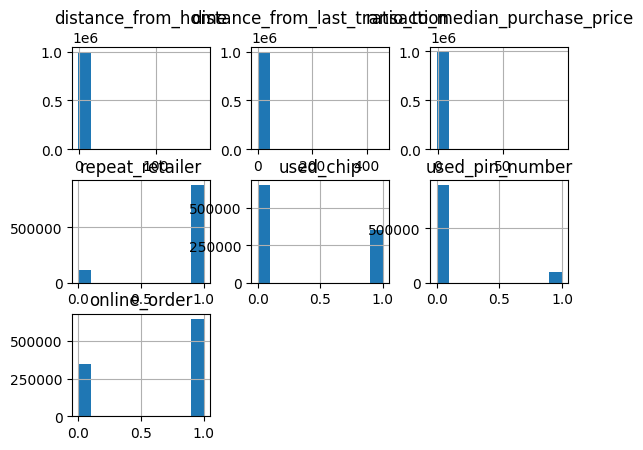

In [5]:
X.hist()

In [6]:
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

# this takes a lot longer
# X, y = SMOTENC(categorical_features=[3,4,5,6]).fit_resample(X, y)
X, y = ADASYN().fit_resample(X, y)
# y.hist()

In [7]:
X.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,1.824482e+06,1.824482e+06,1.824482e+06,1.824482e+06,1.824482e+06,1.824482e+06,1.824482e+06
mean,9.063154e-01,1.084910e+00,5.773838e-01,8.927843e-01,3.540262e-01,7.501405e-02,6.761873e-01
std,4.873965e+00,5.258346e+00,2.602933e+00,3.070930e-01,4.747288e-01,2.619691e-01,4.640424e-01
min,-4.071511e-01,-1.948839e-01,-6.500182e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-3.293784e-01,-1.766872e-01,-3.996984e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-1.521743e-01,-1.193401e-01,4.015036e-02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,8.496077e-01,2.431748e-01,8.053049e-01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,1.621956e+02,4.583845e+02,9.500641e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


array([[<Axes: title={'center': 'distance_from_home'}>,
        <Axes: title={'center': 'distance_from_last_transaction'}>,
        <Axes: title={'center': 'ratio_to_median_purchase_price'}>],
       [<Axes: title={'center': 'repeat_retailer'}>,
        <Axes: title={'center': 'used_chip'}>,
        <Axes: title={'center': 'used_pin_number'}>],
       [<Axes: title={'center': 'online_order'}>, <Axes: >, <Axes: >]],
      dtype=object)

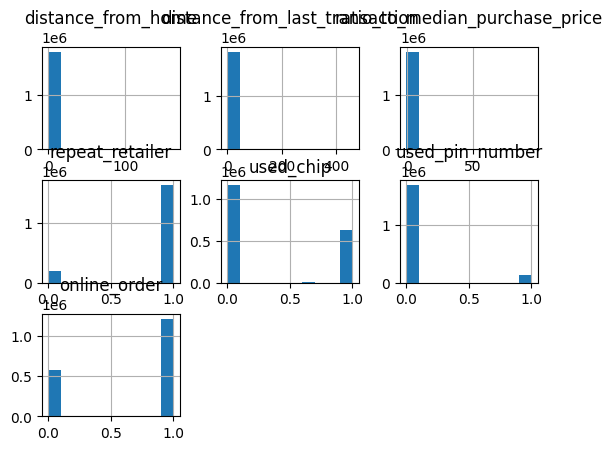

In [8]:
X.hist()

# Models

### Basic logistic regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_preds = logit_model.predict(X_test)

In [10]:
for pred, actual in zip(y_test[:20], y_preds[:20]):
    print(f'{actual} : {pred}')

1.0 : 1.0
0.0 : 0.0
1.0 : 1.0
1.0 : 1.0
1.0 : 1.0
1.0 : 1.0
0.0 : 0.0
1.0 : 1.0
0.0 : 0.0
1.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
1.0 : 1.0
0.0 : 0.0
1.0 : 1.0
1.0 : 1.0
0.0 : 0.0
1.0 : 1.0
0.0 : 0.0


Metrics

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print(f'Accuracy: {logit_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')

Accuracy: 0.9346034634431086
Precision: 0.9204214981046408
F1 score: 0.9355243995687756
Recall: 0.9511312068037228
Confusion Matrix: 
[[167911  14968]
 [  8895 173123]]


In [12]:
# now I want to see the regression coefficients
dict(zip(logit_model.coef_.flatten(), X.columns))

{1.9001243253980815: 'distance_from_home',
 1.7873431187149558: 'distance_from_last_transaction',
 2.9928180514928933: 'ratio_to_median_purchase_price',
 -0.9767157542405213: 'repeat_retailer',
 -0.7340735137401606: 'used_chip',
 -4.383789601855251: 'used_pin_number',
 3.494506640891569: 'online_order'}

These coefficients look really solid:

- Holding all else constant, for every unit increase in `ratio_to_median_purchase_price` we expect an increase of __2.99__ in likelihood that the purchase was __fraudulent__.
- Holding all else constant, when the purchase was made with a `repeat_retailer` we expect an increase of __0.97__ in likelihood that the purchase was __legit__.
- Holding all else constant, when the purchase was made with a `used_pin_number` we expect an increase of __4.38__ in likelihood that the purchase was __legit__.
- Holding all else constant, when the purchase was made with a `online_order` we expect an increase of __3.34__ in likelihood that the purchase was __fraudulent__.

### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_preds = decision_tree_model.predict(X_test)

In [14]:
for pred, actual in zip(y_test[:20], y_preds[:20]):
    print(f'{actual} : {pred}')

1.0 : 1.0
0.0 : 0.0
1.0 : 1.0
1.0 : 1.0
1.0 : 1.0
1.0 : 1.0
0.0 : 0.0
1.0 : 1.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
1.0 : 1.0
0.0 : 0.0
1.0 : 1.0
1.0 : 1.0
0.0 : 0.0
1.0 : 1.0
0.0 : 0.0


In [15]:
print(f'Accuracy: {decision_tree_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')

Accuracy: 0.9999835570037572
Precision: 0.9999835181135932
F1 score: 0.9999835181135932
Recall: 0.9999835181135932
Confusion Matrix: 
[[182876      3]
 [     3 182015]]


### XGBoost

In [16]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_preds = xgb_model.predict(X_test)

In [17]:
print(f'Accuracy: {xgb_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')

Accuracy: 0.9998246080400771
Precision: 0.9996759523704908
F1 score: 0.9998242192864402
Recall: 0.999972530189322
Confusion Matrix: 
[[182820     59]
 [     5 182013]]


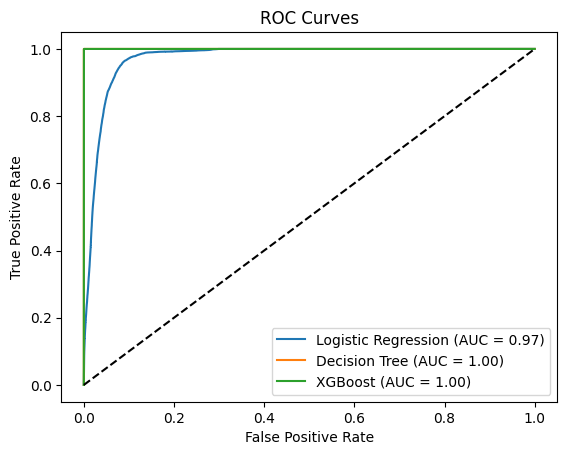

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for each model
logit_probs = logit_model.predict_proba(X_test)[:, 1]
dt_probs = decision_tree_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for each model
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# Compute the AUC score for each model
logit_auc = roc_auc_score(y_test, logit_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Plot the ROC curves
plt.plot(logit_fpr, logit_tpr, label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

# Show the plotA
plt.show()

## Using p-values to determine which variables to keep

In [19]:
import statsmodels.api as sm
import numpy as np

# Fit logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Get summary statistics
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.286736
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:              1459585
Model:                          Logit   Df Residuals:                  1459578
Method:                           MLE   Df Model:                            6
Date:                Thu, 11 Apr 2024   Pseudo R-squ.:                  0.5863
Time:                        10:26:36   Log-Likelihood:            -4.1852e+05
converged:                       True   LL-Null:                   -1.0117e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
distance_from_home                 1.7780      0.005    378.917    

Just kidding... I guess all the features are statistically significant

### SVM using best features

In [21]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC()

X_train = X_train[['distance_from_home', 'repeat_retailer', 'ratio_to_median_purchase_price', 'used_pin_number']]

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_preds = svm_model.predict(X_test)

# Evaluate the model
accuracy = svm_model.score(X_test, y_test)
precision = precision_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
confusion = confusion_matrix(y_test, y_preds)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')
print(f'Recall: {recall}')
print(f'Confusion Matrix: \n{confusion}')